# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd

In [2]:
# Your code here. 
student_data = pd.DataFrame({'StudentID': [1,2,3,4,5,6,7,8,9,10], 'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies' : [10,1,5,9,4,2,9,6,0,3]})

In [3]:
student_data

StudentID  Age  Tardies
0          1   17       10
1          2   51        1
2          3   27        5
3          4   21        9
4          5   36        4
5          6   48        2
6          7   19        9
7          8   26        6
8          9   54        0
9         10   30        3

Draw a dispersion diagram (scatter plot) for the data.

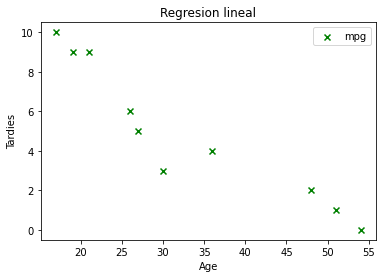

In [4]:
# Your code here.import numpy as np
import pylab as plt
plt.scatter(student_data.Age, student_data.Tardies, marker='x', c='g', label='mpg')
plt.title('Regresion lineal')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show();

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Your response here. 
# A más edad, menos tarde llegan

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.
import numpy as np

In [7]:
covariance = np.cov(student_data.Age, student_data.Tardies)

In [8]:
covariance

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

In [9]:
student_data.corr()

StudentID       Age   Tardies
StudentID   1.000000  0.186190 -0.347113
Age         0.186190  1.000000 -0.939163
Tardies    -0.347113 -0.939163  1.000000

In [10]:
#vemos que Age y Tardies están altamente correlacionadas de forma inversa

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [11]:
# Your response here.
from sklearn.linear_model import LinearRegression as LinReg

/Users/rociomoreno/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [68]:
X=sm.add_constant(student_data.Age)

y=student_data.Tardies

modelo=sm.OLS(y, X).fit()

In [69]:
modelo.predict(X)

0    8.760850
1    0.504944
2    6.332643
3    7.789567
4    4.147256
5    1.233406
6    8.275209
7    6.575463
8   -0.223518
9    5.604180
dtype: float64

In [70]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           5.57e-05
Time:                        13:21:24   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

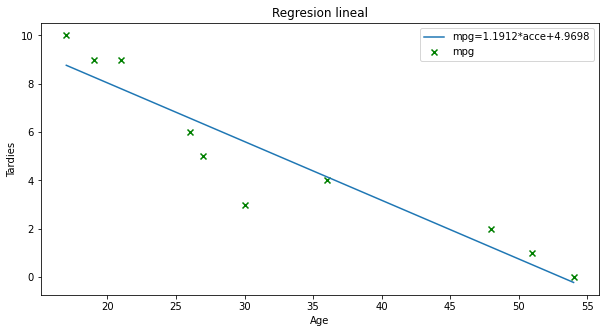

In [76]:
# plot

x=np.linspace(student_data.Age.min(), student_data.Age.max(), 50)
y=-0.2428*x + 12.8888

plt.figure(figsize=(10, 5))

# la recta de ajuste
plt.plot(x, y, label='mpg={}*acce+{}'.format(1.1912, 4.9698))

# datos
plt.scatter(student_data.Age, student_data.Tardies, marker='x', c='g', label='mpg')

plt.title('Regresion lineal')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [17]:
# Your response here. 


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [77]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('../data/vehicles.csv')

In [78]:
vehicles.head()

Make                Model  Year  Engine Displacement  \
0        AM General    DJ Po Vehicle 2WD  1984                  2.5   
1        AM General     FJ8c Post Office  1984                  4.2   
2        AM General  Post Office DJ5 2WD  1985                  2.5   
3        AM General  Post Office DJ8 2WD  1985                  4.2   
4  ASC Incorporated                  GNX  1987                  3.8   

   Cylinders     Transmission        Drivetrain                Vehicle Class  \
0        4.0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   
1        6.0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   
2        4.0  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   
3        6.0  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   
4        6.0  Automatic 4-spd  Rear-Wheel Drive                 Midsize Cars   

  Fuel Type  Fuel Barrels/Year  City MPG  Highway MPG  Combined MPG  \
0   Regular          19.388824        18           17            17   
1   Regular          25.354615        13           13            13   
2   Regular          20.600625        16           17            16   
3   Regular          25.354615        13           13            13   
4   Premium          20.600625        14           21            16   

   CO2 Emission Grams/Mile  Fuel Cost/Year  
0               522.764706            1950  
1               683.615385            2550  
2               555.437500            2100  
3               683.615385            2550  
4               555.437500            2550

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [83]:
# Your response here. 
vehicles.drop(['Make', 'Model', 'Engine Displacement', 'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type'\
              ,'City MPG', 'Highway MPG'], axis = 1, inplace = True)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [85]:
import seaborn as sns

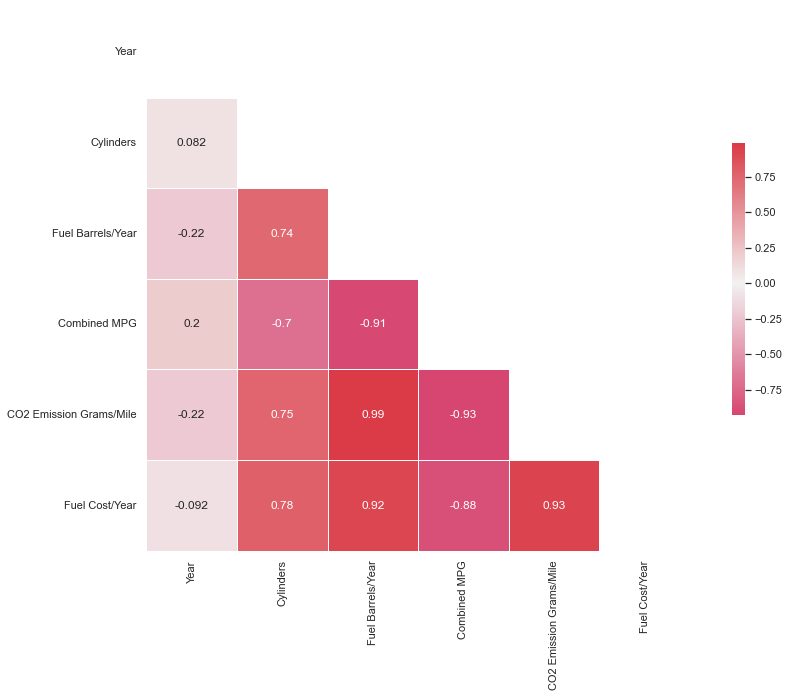

In [86]:
# Your response here. 
plt.figure(figsize=(15, 10))
sns.set(style='white')
mask=np.triu(np.ones_like(vehicles.corr(), dtype=bool))
cmap=sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(vehicles.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});


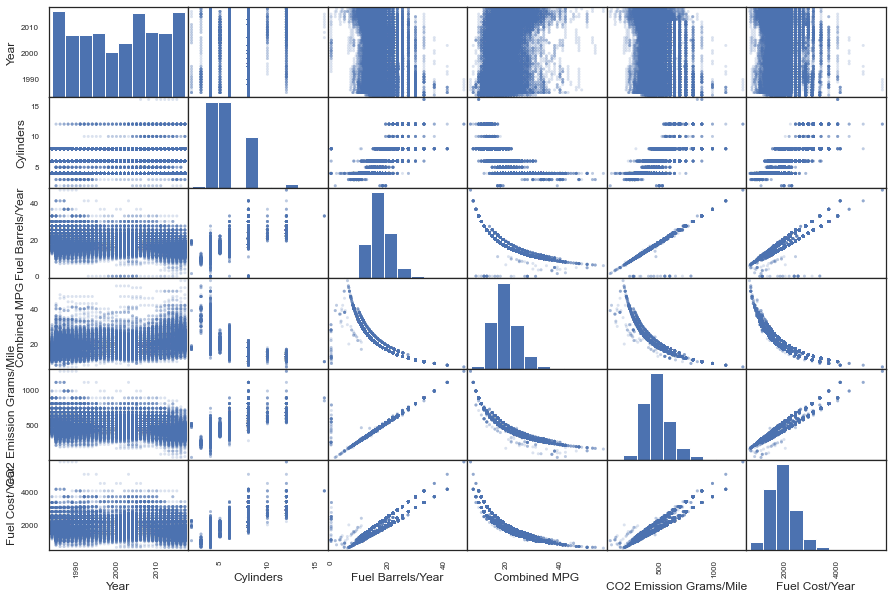

In [87]:
pd.plotting.scatter_matrix(vehicles, figsize=(15, 10), alpha=0.2);

In [88]:
vehicles.columns

Index(['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [92]:
x=sm.add_constant(vehicles[[
    'Year',
    'Cylinders',
    'Fuel Barrels/Year',
    'Combined MPG',
    'Fuel Cost/Year',
]])
y=vehicles['CO2 Emission Grams/Mile']
modelo=sm.OLS(y, x).fit()
pred=modelo.predict(x)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                             14:40:00   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
pred

0        522.030384
1        671.001053
2        552.684951
3        670.680436
4        570.340582
            ...    
35947    230.654658
35948    230.334041
35949    230.013424
35950    229.692808
35951    239.332836
Length: 35952, dtype: float64

In [97]:
x.tail()

const  Year  Cylinders  Fuel Barrels/Year  Combined MPG  Fuel Cost/Year
35947    1.0  2013        3.0           9.155833            36            1100
35948    1.0  2014        3.0           9.155833            36            1100
35949    1.0  2015        3.0           9.155833            36            1100
35950    1.0  2016        3.0           9.155833            36            1100
35951    1.0  2016        3.0           9.417429            35            1150

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [21]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [22]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [23]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [24]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [25]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [26]:
# Your response here. 